<a href="https://colab.research.google.com/github/ProfessorPatrickSlatraigh/CST3512/blob/main/CST3512_Employment_Unemployment_13_May_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Employment and Unemployment Levels 

**Using U.S. Bureau of Labor Statistics data**    
Source information available at [bls.gov/ces/](https://www.bls.gov/ces/)

*from the original work of CST3512 student Shaolong Lin, May-2022*  


**The following outline describes the approach in this notebook:**    

A. <u>PROBLEM STATEMENT</u>    
    
H.  Housekeeping     

B. <u>STRAIGHTFORWARD DICTIONARY READ OF `.CSV` FILES</u>    
B.1 Creating a DataFrame Based on a Dictionary for 'Employment_Level'      
B.2 Creating a DataFrame Based on a Dictionary for 'UnEmployment_Level'     
B.3 Combine Employment and UnEmployment Level Data    

C. <u>PANDAS WRANGLING AND `.MELT()`</u>    
C1. Load Data for Emplyoyment Level
C2. Transform Employment Level Data    
C3. Load Data for UnEmployment Level    
C4. Transform UnEmployment Level Data    
C5. Combine Employment and UnEmployment Level Data   

D. <u>SOME TIMESERIES PLOTTING EXAMPLES</u>    
D.1 Single Line Plot: Employment_Level    
D.2 Single Line Plot: UnEmployment_Level    
D.3 Dual Line Plot: Employment_Level & UnEmployment_Level - same y axis   
D.4 Dual Line Plot: Employment_Level & UnEmployment_Level - twin y axes     
D.5 Employment_Level Candlestick Chart of Yearly OHLC (plotly `go`)    
D.6 Un-Employment_Level Candlestick Chart of Yearly OHLC (plotly `go`)     
D.7 Employment_Level and Un-Employment_Level Candlestick Chart of Yearly OHLC (plotly `go`)      

X. <u>APPENDIX: Datetime Reference Information</u>   


**SHORTHAND/NOTES**    

This notebook uses the following conventions for expediency and consistency: 

**`_df`** : refers to a dataframe variable    
**`_str`** : refers to a string variable    
**`_list`** : refers to a list variable    
**`_dict`** : refers to a dictionary variable   
**`_gb`** : refers to a `.groupby()`series variable     

**`el_`** : refers to a variable with **Employment Level** data    
**`ul_`** : refers to a variable with **Un-Employment Level** data    

**`_ohlc_`** : refers to data with **Open, High, Low, Close** (ohlc) values    

*note: `ohlc` data is used in candlestick charts and other financial analysis.*    
*See [this description of `ohlc` from Investopedia](https://www.investopedia.com/terms/o/ohlcchart.asp) for definitions and uses of the term and its applications.* 




---



##A. PROBLEM STATEMENT    


The U.S. Bureau of Labor Statistics [**BLS**](https://bls.gov) provides information on employment levels and on unemployment levels by month.  Historic monthly data is available for each metric in a `.csv` file with the following format:

* the first 11 rows of each `.csv` file is header information    
* the 12th row is essentially column headings, but:     
  - 'Year' is the column heading for the first column    
  - each of the remaining columns has a three character month abbreviation as a heading, the underlying data is all for the same metric    
* depending on the release date of the `.csv` file, there may be columns in the last row (the last year) which do not yet have data because that data is either for a future month or the data was not yet processed at the time of the release of that `.csv` file    

The files to be processed are:    

* ["Employment Level - BLS Data Series.csv"](https://raw.githubusercontent.com/ProfessorPatrickSlatraigh/data/main/Employment%20Level%20-%20BLS%20Data%20Series.csv)    
* ["Unemployment Level - BLS Data Series.csv"](https://raw.githubusercontent.com/ProfessorPatrickSlatraigh/data/main/Unemployment%20Level%20-%20BLS%20Data%20Series.csv)    


###The Problem    

**The challenge is to wrangle the two source data files, one for each metric, into a single dataframe with:**    

1. **a column for each metric with the metric name as the column name**    
2. **a row for every combination of year and month**    
3. **a datetime index based on the year and month of each row**    

**Section B of this notebook produces a DataFrame `df` with each metric as a column and the datetime as an index by reading the source files into dictionaries then creating interim DataFrames from the dictionaries.**    

**Section C of this notebook produces a DataFrame `df` with each metric as a column and the datetime as an index by reading the source files into  interim DataFrames which are wrangled and then used to produce the resultant dictionary.**    

*Both <u>Section B</u> and <u>Section C</u> produce the same dictionary `df` as a result of the two different approaches.* 

The following exhibits display images of the content of the files.

**<h3 align="center"><u>Exhibit 1 - Sample BLS Employment Level Monthly Data .CSV File</u></h3>**    


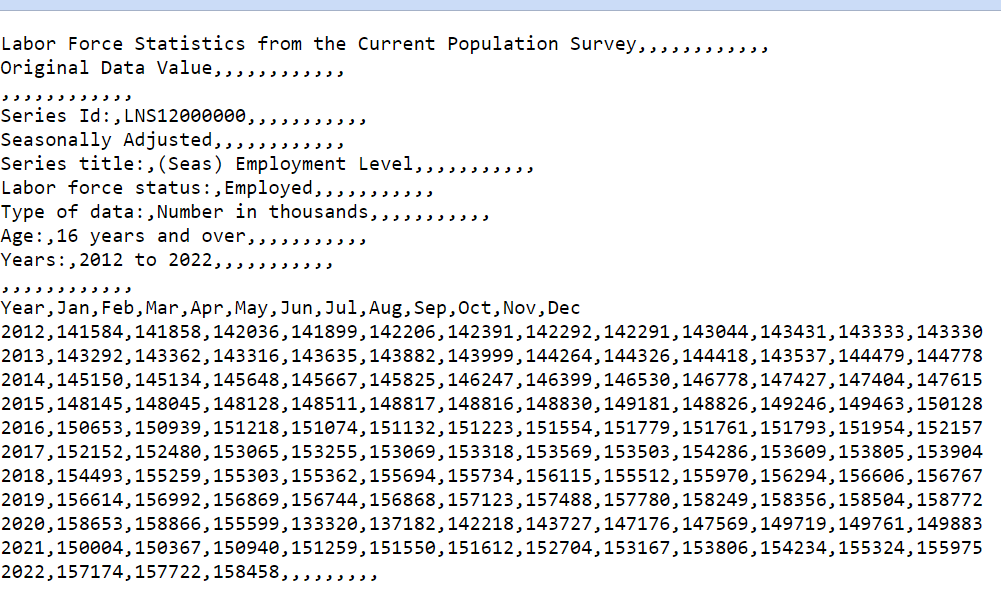

**<h3 align="center"><u>Exhibit 2 - Sample BLS UnEmployment Level Monthly Data .CSV File</u></h3>**    


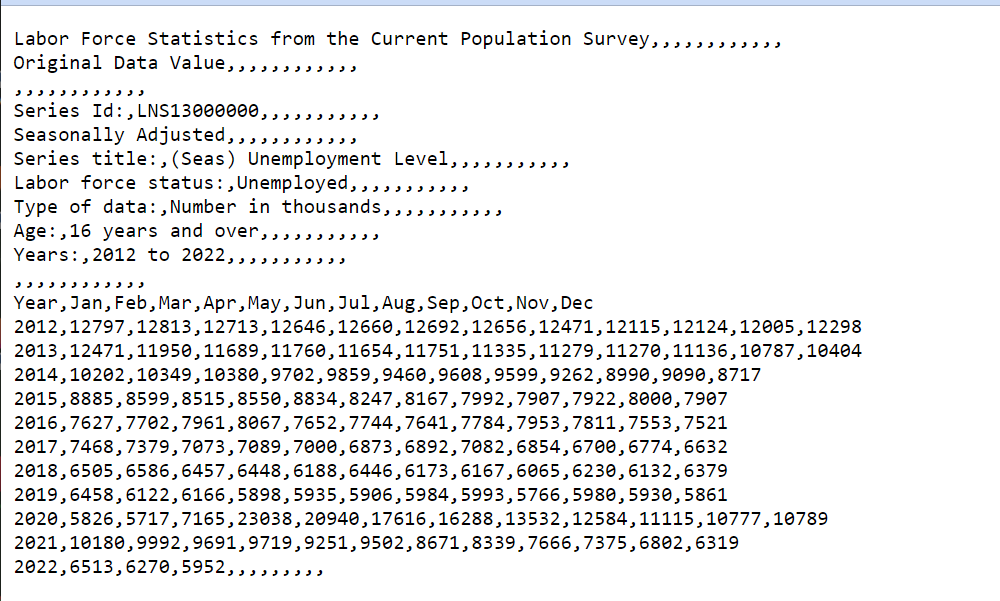

###**The Solution**   

Produce a single datframe (`df`) which has a `timeseries` index and a column for `Employment_Level` as well as a columns for `UnEmployment_Level` along with other monthly features where each row in the dataframe `df` represents one month.    

The following <u>Exhibit 3 - Solution Dataframe `df`</u> shows an example of the bottom 18 records of the desire dataframe as you might see it with by invoking `df.tail(18)`.    


**<h3 align="center"><u>Exhibit 3 - Solution Dataframe `df`</u></h3>**    


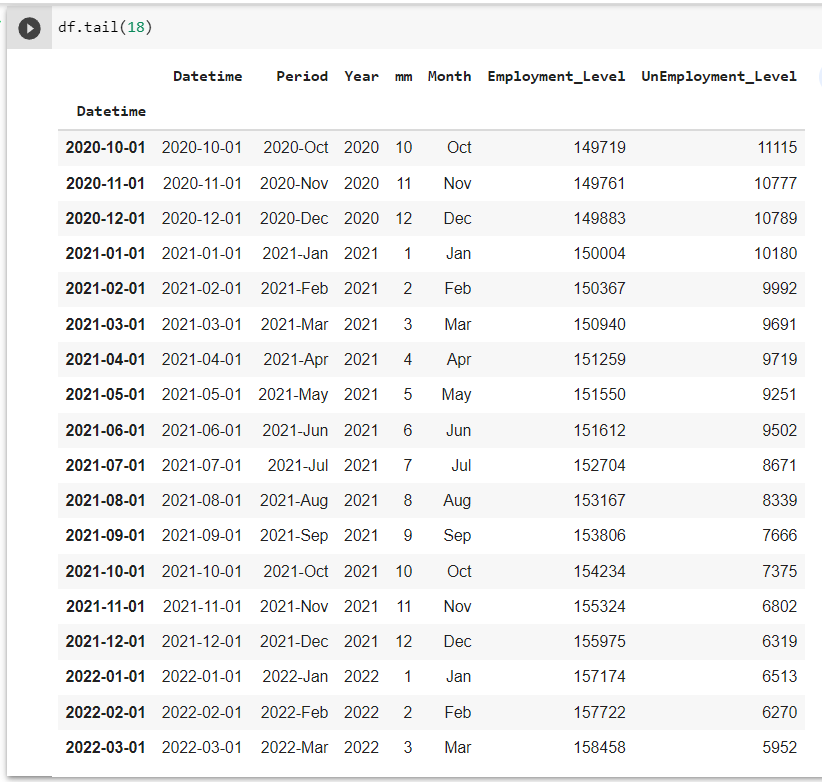



---



##H. Housekeeping    

**General housekeeping in support of the remainder of the notebook.**
* Load files to current working directory    

* Import libraries    

* Create standing value variables (dictionary of month abbreviations to month integers)    

###Load files to the current working directory    

This notebook reads data from the following U.S. Bureau of Labor Statistics (BLS) `.csv` files:

* ["Employment Level - BLS Data Series.csv"](https://raw.githubusercontent.com/ProfessorPatrickSlatraigh/data/main/Employment%20Level%20-%20BLS%20Data%20Series.csv)    
* ["Unemployment Level - BLS Data Series.csv"](https://raw.githubusercontent.com/ProfessorPatrickSlatraigh/data/main/Unemployment%20Level%20-%20BLS%20Data%20Series.csv)    

Load copies of both files to the current working directory using `!curl` statements and raw source files from **Github** 


In [2]:
!curl https://raw.githubusercontent.com/ProfessorPatrickSlatraigh/data/main/Employment%20Level%20-%20BLS%20Data%20Series.csv -o "bls_employment-level.csv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1392  100  1392    0     0  13132      0 --:--:-- --:--:-- --:--:-- 13009


In [3]:
!curl https://raw.githubusercontent.com/ProfessorPatrickSlatraigh/data/main/Unemployment%20Level%20-%20BLS%20Data%20Series.csv -o "bls_unemployment-level.csv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1187  100  1187    0     0  13488      0 --:--:-- --:--:-- --:--:-- 13488


### Imports    

In [42]:
import pandas as pd  # our usual suspect    
#import numpy as np  # not needed (yet)    

import csv           # to read the .csv files (sometimes)

# %matplotlib inline                            # is this needed?
import matplotlib                               # for plotting    
import matplotlib.pyplot as plt                 # ditto
import matplotlib.dates as mdates               # dates in plots
import matplotlib.ticker as mticker             # tickers in plots

import datetime      # for indexing on datetime

Import `go` from `plotly` if that is desired for plotting.    
*note: This will be used at the bottom of the notebook when we plot candlestick charts of `ohlc` (Open, High, Low, Close).*         


In [43]:
import plotly.graph_objects as go               # another resource for plots

###Create a list of month abbreviations (from column names) for ISO date    
assign `[ 'Months', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']` to `month_list`    

*This will be used to create an ISO formatted datetime string with the `'Year'` and a '-' as a prefix to the abbreviation of a month, where needed.*    

*We are padding element[0] of the list with the string 'Months' to align the month abbreviation indices with the indices we will see in the lines read from the file later -- remember the first element read from each file is the integer value of 'Year'.*    


In [44]:
# Create a list of month abbreviations (from column names) for ISO date
# Pad the list with the string 'Months' as the first element
month_list = ['Months',
              'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
              ]

###Create a dictionary of month abbreviations (from column names) to integers
assign `{'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}` to `month_dict`    

*This will be used to create a column with the integer value of a month, where needed.*    


In [45]:
# Create a dictionary of month abbreviations (from column names) to integers
month_dict = {'Jan': 1, 'Feb': 2, 'Mar': 3,
              'Apr': 4, 'May': 5, 'Jun': 6, 
              'Jul': 7, 'Aug': 8, 'Sep': 9, 
              'Oct': 10, 'Nov': 11, 'Dec': 12
              }

###Create strings of datetime format tokens for creation of `datetime` objects    



assign `"%Y-$B"` to `yyyymmm_token_str`    

*This will be used when reading string content of a four-digit year, hyphen, and three-character month abbreviation into a `datetime` object.*    


In [46]:
yyyymmm_token_str = '%Y-%b'  # to read a date string in the format 'YYYY-Mmm' 


assign `"%Y"` to `yyyy_token_str`    

*This will be used when reading string content of a four-digit year into a `datetime` object.*    


In [47]:
yyyy_token_str = '%Y'  # to read a date string in the format 'YYYY' 



---



##B. STRAIGHTFORWARD DICTIONARY READ OF `.CSV` FILES        

While the file formats present some challenges, they are not overly complex.    

If we wanted, we could read each file into a dictionary `el_dict` which will be used to create a dataframe for 'Employment_Level' which will be used later together with a similar dictionary `ul_dict` created with the other metric 'Un-Employment_Level'.    


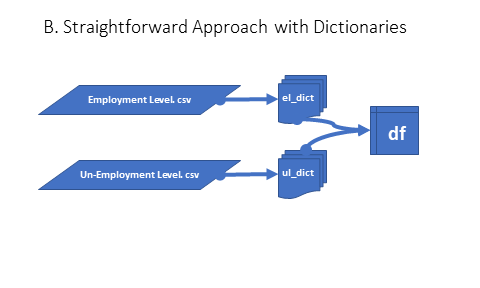



---



###B.1 Creating a DataFrame Based on a Dictionary for 'Employment_Level'    


In [48]:
el_dict = dict()

Based on the assumption that we know there are 11 header rows followed by a consistent row of column headings, we can process the file beginning with row 13, through the end of the file.  

Open the **Employment Level** `.csv` file into a file handle and, beginning at row 13:    

* read the first value as the 'Year'    
* use a loop to read the next 12 values as the metric values for each month and execute the following for each month's data read:
    - construct a string of the 'Year' as four-digits, concatentated with '-', concatenated with the three letter abbreviation of the month    
    - insert a `key:value` pair of the ISO date string constructed as the key and the metric value for that month as the value          


In [ ]:
with open( "bls_employment-level.csv", 'r' ) as el_File:
    el_handle = csv.reader(el_File)
    # start a counter for the line number
    el_line = 0
    for line in el_handle:
        # increment the line number counter
        el_line += 1
        # check that past headers and not end of file 
        if line and el_line > 12 :
            # assign the first column value to 'year'
            year = line[0]
            # start a counter for the month within  the year
            m = 1
            # check that at most 12 months are processed per line
            while m < 13 :
                # check that there is data for the month
                if line[m]:
                  # scaffolding to peek at key:value for this iteration
                  # print(str(year) +'-' + month_list[m], line[m])
                  key = str(year) +'-' + month_list[m]
                  value = int(line[m])
                  print(key, value)
                  el_dict[key] = value
                m += 1
            print()

What do we have in our `el_dict` dictionary?   


In [ ]:
el_dict

Create a dataframe `el_df` using the dictionary `el_dict`    

In [50]:
el_df = pd.DataFrame.from_dict(el_dict, orient="index").reset_index()

What does our `el_df` dataframe include?

In [ ]:
el_df.info()

In [ ]:
el_df.head(24)

Let's rename column 0 in `el_df` to 'Employment_Level'.    


In [51]:
el_df.columns = ['Period','Employment_Level']

In [ ]:
el_df.info()



---



###B.2 Creating a DataFrame Based on a Dictionary for 'UnEmployment_Level'    


In [52]:
ul_dict = dict()

Based on the assumption that we know there are 11 header rows followed by a consistent row of column headings, we can process the file beginning with row 13, through the end of the file.  

Open the **Un-Employment Level** `.csv` file into a file handle and, beginning at row 13:    

* read the first value as the 'Year'    
* use a loop to read the next 12 values as the metric values for each month and execute the following for each month's data read:
    - construct a string of the 'Year' as four-digits, concatentated with '-', concatenated with the three letter abbreviation of the month    
    - insert a `key:value` pair of the ISO date string constructed as the key and the metric value for that month as the value          


In [ ]:
with open( "bls_unemployment-level.csv", 'r' ) as ul_File:
    ul_handle = csv.reader(ul_File)
    # start a counter for the line number
    ul_line = 0
    for line in ul_handle:
        # increment the line number counter
        ul_line += 1
        # check that past headers and not end of file 
        if line and ul_line > 12 :
            # assign the first column value to 'year'
            year = line[0]
            # start a counter for the month within  the year
            m = 1
            # check that at most 12 months are processed per line
            while m < 13 :
                # check that there is data for the month
                if line[m]:
                  # scaffolding to peek at key:value for this iteration
                  # print(str(year) +'-' + month_list[m], line[m])
                  key = str(year) +'-' + month_list[m]
                  value = int(line[m])
                  print(key, value)
                  ul_dict[key] = value
                m += 1
            print()

*note: if we were processing files of this format often, we would do well to create a generalized function to process the reading of each file and dictionary creation, rather than copying and modifying the code for each execution.*    


What do we have in our `ul_dict` dictionary?   


In [ ]:
ul_dict

Create a dataframe `el_df` using the dictionary `el_dict`    

In [54]:
ul_df = pd.DataFrame.from_dict(ul_dict, orient="index").reset_index()

What does our `el_df` dataframe include?

In [ ]:
ul_df.info()

In [ ]:
ul_df.head(24)

Let's rename column 0 in `el_df` to 'UnEmployment_Level'.    


In [55]:
ul_df.columns = ['Period','UnEmployment_Level']

In [ ]:
ul_df.info()



---



###B.3 Combine Employment and UnEmployment Level Data    

First, let's index both of our metric dataframes (`el_df` and `ul_df`)  using `datetime`.    


In [56]:
# Here is where we use the variable `yyyymmm_token_str` we created in Housekeeping
el_df['Datetime'] = pd.to_datetime(el_df['Period'], format=yyyymmm_token_str)
el_df = el_df.set_index(pd.DatetimeIndex(el_df['Datetime']))

In [57]:
# Here is where we use the variable `yyyymmm_token_str` we created in Housekeeping
ul_df['Datetime'] = pd.to_datetime(ul_df['Period'], format=yyyymmm_token_str)
ul_df = ul_df.set_index(pd.DatetimeIndex(ul_df['Datetime']))

One last look at each metric's dataframe.   

In [ ]:
el_df.info()
ul_df.info() 

Using the **Employment Level** data in the `el_df` dataframe, create a new `df` dataframe which will be used as the foundational dataframe to include **UnEmployment Level** column data from the `ul_df` dataframe.    

In [59]:
df = el_df

Create a column `UnEmployment_Level` in the new `df` dataframe and assign values to that column using the `UnEmployment_Level` column in the `ul_df` dataframe.    

In [60]:
df['UnEmployment_Level'] = ul_df['UnEmployment_Level'].values

In [ ]:
df.info()

We can extract data from the 'Period' column to construct the following columns as well:    

* **'Year'** : the four digit year as an integer    
* **'Month'** : the three character month abbreviation as a string    
* **'mm'** : the two digit month as an integer    


In [61]:
# Creat a column 'Year' for the four digit year as an integer
df['Year'] = df.Period.str.slice(0,4).astype('int')

In [62]:
# Create a column 'Month' for the three character month abbreviation
df['Month'] = df.Period.str[5:]

In [63]:
# Create a column `mm` for the integer value of the month 
df['mm'] = df['Month'].replace(month_dict)

In [ ]:
df.info()

Because we have `Datetime` as the index, we can drop the `Datetime` column but let's retain it in case we want it in the future.   While we are at it, let's rearrange the order of the columns to be more inuitive.   

In [64]:
df = df[['Datetime', 'Period', 'Year', 'mm', 'Month', 'Employment_Level', 'UnEmployment_Level']]

In [ ]:
df.info()

In [ ]:
df.head(24)

Let's sort the `df` dataframe by its index.

In [65]:
df.sort_index(axis = 0, inplace=True)

In [ ]:
df.tail(18)

Now, we have one `df` dataframe with a row for every month in every year and  columns for both `Employment_Level` and `Un-Employment_Level` using a `Datetime` index.



---



##C. PANDAS DATA WRANGLING AND `.MELT()`     

This approach reads each source file directly into a Pandas dataframe (`el_df` and `ul_df` respectively for Employment and UmEmployment Levels).    

Because of the structure of the source files, the interim dataframes populated, `el_col_df` for **Employment Level** and `ul_col_df` for **Un-Employment Level** require some data wrangling before they are ready to be combined into the resultant `df` dataframe.    


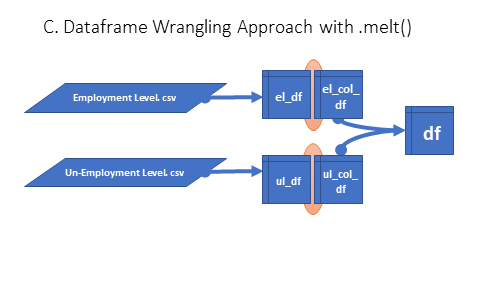

###C1. Load Data for Employment Level    


####Read the file into DataFrame `el_df` from the current working directory    

Skip the first 11 rows of header information.    


In [175]:
el_df = pd.read_csv('/content/bls_employment-level.csv', skiprows = 11)


In [ ]:
el_df.tail()

Let's replace those pesky `NaN` values with zeroes (0) using `.fillna(0)`    


In [177]:
el_df = el_df.fillna(0)

What do we have?    

In [ ]:
el_df.info()

*It seems that Pandas has made the DataFrame columns which have missing values as type `float` while the columns with data are type `int` (because all of the data read for those columns was integer.)*

###C2. Transform Employment Level Data    

We see a mix of float and integer values for different month columns.    
As this data is headcount data, it lends itself to be treated as integer.   

In [ ]:
el_df

In [180]:
# transform float value columns to integer for consistency
# Q1 - first quarter seems to be moot but transform it just in case  
for month_abbr_str in month_list:
    if month_abbr_str != 'Months' :
        el_df[month_abbr_str] = el_df[month_abbr_str].astype('int')


In [ ]:
el_df.info()

In [ ]:
el_df.head(24)

Now, melt the columns into rows of data.    
Assign the resulting `dataframe` from the `.melt()` method to a new variable `el_col_df`. 

In [182]:
el_col_df = el_df.melt(id_vars= ['Year'])

In [ ]:
el_col_df

Give the melted columns more meaningful names:    

* the `variable` column is our three-character month abbreviation    
* the `value` column is the integer data of employment level for the month    


In [183]:
el_col_df.rename(columns={'variable': 'Month', 'value': 'Employment_Level'}, inplace=True)

In [ ]:
el_col_df.info()

Construct a string column which combines the year and three character month for readability.   Call this column `Period`.  

In [184]:
el_col_df['Period'] = el_col_df['Year'].astype('str') + '-' + el_col_df['Month']

Because we have a `Year` column with the year as an integer, why not create a column with the integer value of the month?   Call this column `mm`.    


In [185]:
# Create a column `mm` for the integer value of the month 
el_col_df['mm'] = el_col_df['Month'].replace(month_dict)

Use the `yyyymmm_token_str` string assigned in *Housekeeping* as an argument to  the Pandas method `.to_datetime()` which creates a `Datetime` object based on the column `Period`.    

Set the `dataframe`'s index to the newly created `Datetime` column.    

In [186]:
el_col_df['Datetime'] = pd.to_datetime(el_col_df['Period'], format=yyyymmm_token_str)
el_col_df = el_col_df.set_index(pd.DatetimeIndex(el_col_df['Datetime']))

In [ ]:
el_col_df.info()

In [ ]:
el_col_df.head(24)

In [ ]:
el_col_df.tail(24)

Finally, let's drop those zero (0) values for the missing months.    


In [187]:
el_col_df.drop(el_col_df[el_col_df.Employment_Level == 0].index, inplace=True)

In [ ]:
el_col_df.tail(24)



---



###C3. Load Data for UnEmployment Data   


####Read the file into DataFrame `ul_df`  the current working directory    

Skip the first 11 rows of header information.    


In [189]:
ul_df = pd.read_csv('/content/bls_unemployment-level.csv', skiprows = 11)


In [ ]:
ul_df.head(24)

*It seems that Pandas has made the DataFrame columns which have missing values as type `float` while the columns with data are type `int` (because all of the data read for those columns was integer.)*

In [ ]:
ul_df.info()

Let's replace those pesky `NaN` values with zeroes (0) using `.fillna(0)`    


In [190]:
ul_df = ul_df.fillna(0)

What do we have?

In [ ]:
ul_df.tail(24)

###C4. Transform Data for UnEmployment Level 

We see a mix of float and integer values for different month columns.    
As this data is headcount data, it lends itself to be treated as integer.   

In [191]:
# transform float value columns to integer for consistency
# Q1 - first quarter seems to be moot but transform it just in case  
for month_abbr_str in month_list:
    if month_abbr_str != 'Months' :
        ul_df[month_abbr_str] = ul_df[month_abbr_str].astype('int')


In [ ]:
ul_df.info()

In [ ]:
ul_df.head(24)

Now, melt the columns into rows of data.    
Assign the resulting `dataframe` from the `.melt()` method to a new variable `ul_col_df`. 

In [193]:
ul_col_df = ul_df.melt(id_vars= ['Year'])

Give the melted columns more meaningful names:    

* the `variable` column is our three-character month abbreviation    
* the `value` column is the integer data of un-employment level for the month    


In [194]:
ul_col_df.rename(columns={'variable': 'Month', 'value': 'UnEmployment_Level'}, inplace=True)

In [ ]:
ul_col_df.info()

Construct a string column which combines the year and three character month for readability.   Call this column `Period`.  

In [195]:
ul_col_df['Period'] = ul_col_df['Year'].astype('str') + '-' + ul_col_df['Month']

Because we have a `Year` column with the year as an integer, why not create a column with the integer value of the month?   Call this column `mm`.    


In [196]:
# Create a column `mm` for the integer value of the month 
ul_col_df['mm'] = ul_col_df['Month'].replace(month_dict)

Use the `yyyymmm_token_str` string assigned in *Housekeeping* as an argument to  the Pandas method `.to_datetime()` which creates a `Datetime` object based on the column `Period`.    

Set the `dataframe`'s index to the newly created `Datetime` column.    

In [197]:
ul_col_df['Datetime'] = pd.to_datetime(ul_col_df['Period'], format=yyyymmm_token_str)
ul_col_df = ul_col_df.set_index(pd.DatetimeIndex(ul_col_df['Datetime']))

In [ ]:
ul_col_df.info()

In [ ]:
ul_col_df.head(24)

In [ ]:
ul_col_df.tail(24)

Finally, let's drop those zero (0) values for the missing months.    


In [198]:
ul_col_df.drop(ul_col_df[ul_col_df.UnEmployment_Level == 0].index, inplace=True)

In [ ]:
ul_col_df.tail(24)



---



###C5. Combine Employment and UnEmployment Level Data    


Using the **Employment Level** data in the `el_col_df` dataframe, create a new `df` dataframe which will be used as the foundational dataframe to include **Un-Employment Level** column data from the `ul_col_df` dataframe.    

In [200]:
df = el_col_df

Create a column `Un-Employment_Level` in the new `df` dataframe and assign values to that column using the `Un-Employment_Level` column in the `ul_col_df` dataframe.    

In [201]:
df['UnEmployment_Level'] = ul_col_df['UnEmployment_Level'].values

Because we have `Datetime` as the index, we can drop the `Datetime` column but let's retain it in case we want it in the future.   While we are at it, let's rearrange the order of the columns to be more inuitive.  

In [202]:
df = df[['Datetime', 'Period', 'Year', 'mm', 'Month', 'Employment_Level', 'UnEmployment_Level']]

In [ ]:
df.info()

In [ ]:
df.head(24)

Let's sort the `df` dataframe by its index.

In [203]:
df.sort_index(axis = 0, inplace=True)

In [ ]:
df.tail(18)

Now, we have one `df` dataframe with a row for every month in every year and  columns for both `Employment_Level` and `Un-Employment_Level` using a `Datetime` index.



---



##D. SOME TIMESERIES PLOTTING EXAMPLES    

Here is a short catalog of some helpful/interesting reference material on plotting options and techniques:    

* [**annotations**](https://jakevdp.github.io/PythonDataScienceHandbook/04.09-text-and-annotation.html) : for matplotlib labels and annotations     
* [**CSS colors**](https://www.w3schools.com/css/css_colors.asp) : overview of CSS colors (matplotlib and plotly)    
* [**color names and examples**](https://www.w3.org/wiki/CSS/Properties/color/keywords) : for quickly choosing colors by standard CSS color name     

*Some sample plots of the data in the `df` dataframe created above.*   

###D.1 Single Line Plot: Employment_Level    


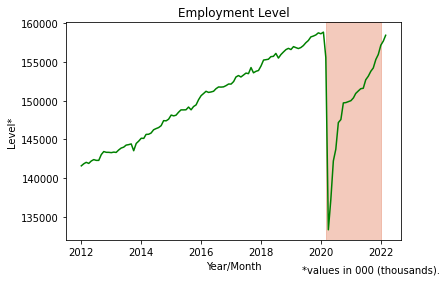

In [216]:
# Line plot of Employment_Level

# depicting the visualization
plt.plot(df.index, df['Employment_Level'], color='green') 
# plotting the index on the x axis does the same as the following statement:
# plt.plot(df.Datetime, df['Employment_Level'], color='green') 
plt.xlabel('Year/Month')                        # x-axis label
plt.ylabel('Level*')                            # y-axis label

# add a footnote
plt.figtext(0.99, 0.01, '*values in 000 (thousands).', 
            horizontalalignment='right')        # right-justified footer

# shading in the Covid-19 pandemic range using datetime start/end on x-axis
start_shaded_bar = pd.to_datetime('2020-Mar', format=yyyymmm_token_str)
end_shaded_bar   =  pd.to_datetime('2022-Jan', format=yyyymmm_token_str)
plt.axvspan(start_shaded_bar, end_shaded_bar, alpha=0.5, color='darksalmon')
  
# displaying the title
plt.title("Employment Level")                  # title (at the top of chart)
  
plt.show() 

###D.2 Single Line Plot: UnEmployment_Level    


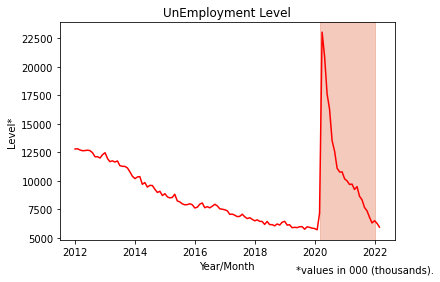

In [217]:
# Line plot of Un-Employment_Level

# depicting the visualization
plt.plot(df.index, df['UnEmployment_Level'], color='red') 
# plotting the index on the x axis does the same as the following statement:
# plt.plot(df.Datetime, df['UnEmployment_Level'], color='red') 
plt.xlabel('Year/Month')                         # x-axis label
plt.ylabel('Level*')                             # y-axis label

# add a footnote
plt.figtext(0.99, 0.01, '*values in 000 (thousands).', 
            horizontalalignment='right')         # right-justified footer

# shading in the Covid-19 pandemic range using datetime start/end on x-axis
start_shaded_bar = pd.to_datetime('2020-Mar', format=yyyymmm_token_str)
end_shaded_bar   =  pd.to_datetime('2022-Jan', format=yyyymmm_token_str)
plt.axvspan(start_shaded_bar, end_shaded_bar, alpha=0.5, color='darksalmon')
  
# displaying the title
plt.title("UnEmployment Level")                  # title (at top of chart)
  
plt.show() 

###D.3 Dual Line Plot: Employment_Level & UnEmployment_Level - same y axis       


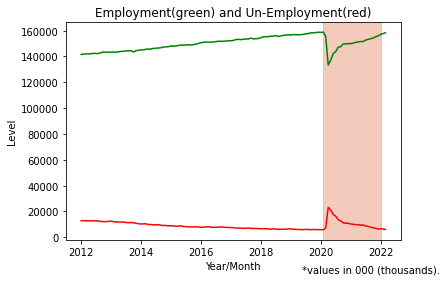

In [226]:
# Line plot of Employment Level and Un-Employment_Level

# depicting the visualization
plt.plot(df.index, df['UnEmployment_Level'], color='red') 
plt.plot(df.index, df['Employment_Level'], color='green') 
# plotting the index on the x axis does the same as the following two statements:
# plt.plot(df.Datetime, df['Employment_Level'], color='green') 
# plt.plot(df.Datetime, df['UnEmployment_Level'], color='red') 
plt.xlabel('Year/Month')                         # x-axis label
plt.ylabel('Level')                              # y-axis label

# add a footnote
plt.figtext(0.99, 0.01, '*values in 000 (thousands).', 
            horizontalalignment='right')         # right-justified footer

# shading in the Covid-19 pandemic range using datetime start/end on x-axis
start_shaded_bar = pd.to_datetime('2020-Feb', format=yyyymmm_token_str)
end_shaded_bar   =  pd.to_datetime('2022-Jan', format=yyyymmm_token_str)
plt.axvspan(start_shaded_bar, end_shaded_bar, alpha=0.5, color='darksalmon')
  
# displaying the title
plt.title("Employment(green) and Un-Employment(red)")  # title (at top of chart)
  
plt.show() 

###D.4 Dual Line Plot: Employment_Level & UnEmployment_Level - twin y axes       


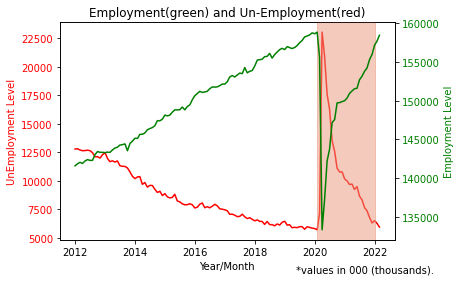

In [225]:
# Create Plot on First Axis (ax1)

fig, ax1 = plt.subplots()               # joining/combining with .subplots()
  
ax1.set_xlabel('Year/Month')                               # x-axis label
ax1.set_ylabel('UnEmployment Level', color = 'red')        # y-axis label
ax1.plot(df.index, df['UnEmployment_Level'], color='red') 
# plotting the index on the x axis does the same as the following two statements:
# plt.plot(df.Datetime, df['Employment_Level'], color='green') 
# plt.plot(df.Datetime, df['UnEmployment_Level'], color='red') 
ax1.tick_params(axis ='y', labelcolor = 'red')             # 1st y-axis color
  
# Adding Twin Axis (ax2)
ax2 = ax1.twinx()                                          # add 2nd y-axis
  
ax2.set_ylabel('Employment Level', color = 'green')        # 2nd y-axis label
ax2.plot(df.index, df['Employment_Level'], color='green') 
ax2.tick_params(axis ='y', labelcolor = 'green')           # 2nd y-axis color

# displaying the title
plt.title("Employment(green) and Un-Employment(red)")      # title (at top)

# add a footnote
plt.figtext(0.99, 0.01, '*values in 000 (thousands).', 
            horizontalalignment='right')                # right-justified footer

# shading in the Covid-19 pandemic range using datetime start/end on x-axis
start_shaded_bar = pd.to_datetime('2020-Feb', format=yyyymmm_token_str)
end_shaded_bar   =  pd.to_datetime('2022-Jan', format=yyyymmm_token_str)
plt.axvspan(start_shaded_bar, end_shaded_bar, alpha=0.5, color='darksalmon')
 
# Show plot

plt.show()

###D.5 Employment_Level Candlestick Chart of Yearly OHLC (plotly `go`)       

*Using `plotly` `go`*



We will want a dataframe with Open, High, Low, and Close (OHLC) columns as well as a date value for charting.  Given the data available, we can construct a chart of OHLC on an annual basis.       

To prepare `Employment_Level` data for `ohlc` analysis, we create series for the following using `Employment_Level` in our `df` dataframe:    
* **Open** : create a `groupby()` series of annual first values in `el_o_gb`    
* **High** : create a `groupby()` series of annual maximum values in `el_h_gb`    
* **Low** : create a `groupby()` series of annual minium values in `el_l_gb` <- that middle character is an 'L' for 'low'        
* **Close** : create a `groupby()` series of annual last values in `el_o_gb`    



In [ ]:
df.info()

In [73]:
# use .groupby() to produce a series of highest Employment_Level by Year
el_h_gb = df['Employment_Level'].groupby(df['Year']).max()

# use .groupby() to produce a series of lowest Employment_Level by Year
el_l_gb = df['Employment_Level'].groupby(df['Year']).min()


In [ ]:
print('Highest Annual `Employment_Level` Values\n',el_h_gb)
print()
print('Lowest Annual `Employment_Level` Values\n',el_l_gb)

In [75]:
# use .groupby() to produce a series of first (opening) Employment_Level by Year
el_o_gb = df['Employment_Level'].groupby(df['Year']).first() 

# use .groupby() to produce a series of last (closing) Employment_Level by Year
el_c_gb = df['Employment_Level'].groupby(df['Year']).last()

In [ ]:
print('Opening Annual `Employment_Level` Values\n',el_o_gb)
print()
print('Closing Annual `Employment_Level` Values\n',el_c_gb)

Now create a dataframe which has columns for `'Year'`, `'Open'`, `'High'`, `'Low'`, and `'Close'`.    
 

In [79]:
# creat a dictionary `ohlc_dict` of the column names and arrays to use for values
el_ohlc_dict = { 'Year': el_o_gb.index, 'Open': el_o_gb, 'High': el_h_gb, 'Low': el_l_gb, 'Close': el_c_gb }
# assign column names and values to a dataframe `el_ohlc_df` using `ohlc_dict`
el_ohlc_df = pd.DataFrame(el_ohlc_dict)

In [ ]:
print('OHLC Annual Values for `Employment_Level`: ')
el_ohlc_df

In [ ]:
# Here is where we use the variable `yyyy_token_str` we created in Housekeeping
el_ohlc_df['Datetime'] = pd.to_datetime(el_ohlc_df['Year'], format=yyyy_token_str)
el_ohlc_df = el_ohlc_df.set_index(pd.DatetimeIndex(el_ohlc_df['Year']))

Let's plot a candlestick chart of `ohlc` data by `Year` using the **plotly** `go` module.    

Documentation on **plotly** `go` can be found [here](https://plotly.com/python/ohlc-charts/).     



In [174]:
# draw the ohlc plot without hovertext control
fig = go.Figure(data=go.Ohlc(
                    x=el_ohlc_df['Year'],        # x-axis series
                    open=el_ohlc_df['Open'],     # open values series
                    high=el_ohlc_df['High'],     # high values series
                    low=el_ohlc_df['Low'],       # low values series
                    close=el_ohlc_df['Close']    # close values series
                    ))

# this turns off the default rangeslider (a GUI control at the bottom of the plot)
fig.update(layout_xaxis_rangeslider_visible=False)  # turn off range slider

# update the figure for some plot formatting  
fig.update_layout(
    title='Yearly Employment from US BLS',       # chart title
    margin_b = 100,        #increase the bottom margin to have space for caption
    yaxis_title='Employment Level*',             # y-axis label 
    xaxis=dict(
        title='Year',                            # x-axis label
        tickmode='linear'),                      # show every value on xaxis
    annotations = [dict(xref='paper',
        yref='paper',
        x=0.5, y=-0.25,
        showarrow=False,
        text =
        '<i>note: period of greatest Covid-19 pandemic impact in orange box.</i>'
        )]                                       # add italicized footnote 
)

# add another annotation/footnote for scale of values 
fig.add_annotation(text="*all values are in 000 (thousands).",
                  xref="paper", yref="paper", bgcolor='aliceblue',
                  x=0, y=0, showarrow=False)

# Add shape of empty orange box for Covid-19 pandemic to the figure
fig.add_shape(type="rect",                       # draw a rectangle
    x0='2019', y0=130000, x1='2022', y1=160000,  # corners of rectangle
    line=dict(color="DarkSalmon"), opacity=0.5,  # rectangle color/transparency
    layer='below',line_width=5,                  # rectangle layer, line width
) 

# update the figure for the shape created 
fig.update_shapes(dict(xref='x', yref='y'))

# display the figure 
fig.show()



---



###D.6 Un-Employment_Level Candlestick Chart of Yearly OHLC (plotly `go`)       

*Using `plotly` `go`*



We will want a dataframe with Open, High, Low, and Close (OHLC) columns as well as a date value for charting.  Given the data available, we can construct a chart of OHLC on an annual basis.       

To prepare `UnEmployment_Level` data for `ohlc` analysis, we create series for the following using `UnEmployment_Level` in our `df` dataframe:    
* **Open** : create a `groupby()` series of annual first values in `ul_o_gb`    
* **High** : create a `groupby()` series of annual maximum values in `ul_h_gb`    
* **Low** : create a `groupby()` series of annual minium values in `ul_l_gb` <- that middle character is an 'L' for 'low'        
* **Close** : create a `groupby()` series of annual last values in `ul_o_gb`    


In [ ]:
df.info()

In [119]:
# use .groupby() to produce an array of highest UnEmployment_Level by Year
ul_h_gb = df['UnEmployment_Level'].groupby(df['Year']).max()

# use .groupby() to produce an array of lowest Employment_Level by Year
ul_l_gb = df['UnEmployment_Level'].groupby(df['Year']).min()


In [ ]:
print('Highest Annual `UnEmployment_Level` Values\n',ul_h_gb)
print()
print('Lowest Annual `UnEmployment_Level` Values\n',ul_l_gb)

In [121]:
# use .groupby() to produce an array of first (opening) UnEmployment_Level by Year
ul_o_gb = df['UnEmployment_Level'].groupby(df['Year']).first() 

# use .groupby() to produce an array of last (closing) Employment_Level by Year
ul_c_gb = df['UnEmployment_Level'].groupby(df['Year']).last()

In [ ]:
print('Opening Annual `UnEmployment_Level` Values\n',ul_o_gb)
print()
print('Closing Annual `UnEmployment_Level` Values\n',ul_c_gb)

Now create a dataframe which has columns for `'Year'`, `'Open'`, `'High'`, `'Low'`, and `'Close'`.    
 

In [123]:
# creat a dictionary `ul_ohlc_dict` of the column names and arrays to use for values
ul_ohlc_dict = { 'Year': ul_o_gb.index, 'Open': ul_o_gb, 'High': ul_h_gb, 'Low': ul_l_gb, 'Close': ul_c_gb }
# assign column names and values to a dataframe `el_ohlc_df` using `ohlc_dict`
ul_ohlc_df = pd.DataFrame(ul_ohlc_dict)

In [ ]:
print('OHLC Annual Values for `UnEmployment_Level`: ')
ul_ohlc_df

In [ ]:
# Here is where we use the variable `yyyy_token_str` we created in Housekeeping
ul_ohlc_df['Datetime'] = pd.to_datetime(ul_ohlc_df['Year'], format=yyyy_token_str)
ul_ohlc_df = ul_ohlc_df.set_index(pd.DatetimeIndex(ul_ohlc_df['Year']))

Let's plot a candlestick chart of `ohlc` data by `Year` using the **plotly** `go` module.    

Documentation on **plotly** `go` can be found [here](https://plotly.com/python/ohlc-charts/).     



In [173]:
# draw the ohlc plot without hovertext control
fig = go.Figure(data=go.Ohlc(
                    x=ul_ohlc_df['Year'],           # x-axis series
                    open=ul_ohlc_df['Open'],        # open values series
                    high=ul_ohlc_df['High'],        # high values series
                    low=ul_ohlc_df['Low'],          # low values series
                    close=ul_ohlc_df['Close'],      # close values series
                    increasing_line_color= 'red',   # line color when up 
                    decreasing_line_color= 'maroon' # line color when down
                    ))

# this turns off the default rangeslider (a GUI control at the bottom of the plot)
fig.update(layout_xaxis_rangeslider_visible=False)  # turn off range slider

# update the figure for some plot formatting  
fig.update_layout(
    title='Yearly Un-Employment from US BLS',    # chart title
    margin_b = 100,        #increase the bottom margin to have space for caption
    yaxis_title='Un-Employment Level*',          # yaxis label 
    xaxis=dict(
        title='Year',                            # xaxis label
        tickmode='linear'),                      # show every value on xaxis
    annotations = [dict(xref='paper',
        yref='paper',
        x=0.5, y=-0.25,
        showarrow=False,
        text =
        '<i>note: period of greatest Covid-19 pandemic impact in orange box.</i>'
        )]                                       # add italicized footnote 
)

# add another annotation/footnote for scale of values 
fig.add_annotation(text="*all values are in 000 (thousands).",
                  xref="paper", yref="paper", bgcolor='aliceblue',
                  x=0, y=0, showarrow=False)

# Add shape of empty orange box for Covid-19 pandemic to the figure
fig.add_shape(type="rect",                       # draw a rectangle
    x0='2019', y0=0, x1='2021', y1=25000,  # corners of rectangle
    line=dict(color="DarkSalmon"), opacity=0.5,  # rectangle color/transparency
    layer='below',line_width=5,                  # rectangle layer, line width
) 

# update the figure for the shape created 
fig.update_shapes(dict(xref='x', yref='y'))

# display the figure 
fig.show()

What if we plot both candlestick charts together?    

###D.7 Employment_Level and Un-Employment_Level Candlestick Chart of Yearly OHLC (plotly `go`)       

*Using `plotly` `go`*



In [172]:
### FIRST DRAW THE EMPLOYMENT LEVEL PLOT AS FIG1  ### 

# draw the el ohlc plot without hovertext control as fig1
fig1 = go.Figure(data=go.Ohlc(
                    x=el_ohlc_df['Year'],        # x-axis series
                    open=el_ohlc_df['Open'],     # open values series
                    high=el_ohlc_df['High'],     # high values series
                    low=el_ohlc_df['Low'],       # low values series
                    close=el_ohlc_df['Close']    # close values series
                    ))

# this turns off the default rangeslider (a GUI control at the bottom of fig1)
# fig1.update(layout_xaxis_rangeslider_visible=False)  # turn off range slider

# give fig1 a descriptive trace name 
fig1.update_traces(name='Employment', showlegend = True)

### NOW CREATE THE UN-EMPLOYMENT LEVEL PLOT AS FIG2  ### 

# draw the ul ohlc plot without hovertext control as fig2
fig2 = go.Figure(data=go.Ohlc(
                    x=ul_ohlc_df['Year'],           # x-axis series
                    open=ul_ohlc_df['Open'],        # open values series
                    high=ul_ohlc_df['High'],        # high values series
                    low=ul_ohlc_df['Low'],          # low values series
                    close=ul_ohlc_df['Close'],      # close values series
                    increasing_line_color= 'red',   # line color when up
                    decreasing_line_color= 'maroon' # line color when down
                    ))

# this turns off the default rangeslider (a GUI control at the bottom of fig2)
# fig2.update(layout_xaxis_rangeslider_visible=False)  # turn off range slider

# give fig2 a descriptive trace name 
fig2.update_traces(name='Un-employment', showlegend = True)

### THE COMBINE THE TWO PLOTS (FIG1, FIG2) AS A NEW FIG  ###
fig = go.Figure(data = fig1.data + fig2.data)

# this turns off the default rangeslider (a GUI control at the bottom of fig)
fig.update(layout_xaxis_rangeslider_visible=False)  # turn off range slider

# update the combined figure (fig) for some plot formatting  
# update the figure (fig) for some plot formatting  
fig.update_layout(
    title='Yearly Employment and Un-Employment from US BLS',   # chart title
    margin_b = 100,        #increase the bottom margin to have space for caption
    yaxis_title='Level*',                        # yaxis label 
    xaxis=dict(
        title='Year',                            # xaxis label
        tickmode='linear'),                      # show every value on xaxis
    annotations = [dict(xref='paper',
        yref='paper',
        x=0.5, y=-0.25,
        showarrow=False,
        text =
        '<i>note: period of greatest Covid-19 pandemic impact in orange box.</i>'
        )]                                       # add italicized footnote 
)

# add another annotation/footnote for scale of values 
fig.add_annotation(text="*all values are in 000 (thousands).",
                  xref="paper", yref="paper", bgcolor='aliceblue',
                  x=0, y=0, showarrow=False)

# Add shape of empty orange box for Covid-19 pandemic to the figure
fig.add_shape(type="rect",                       # draw a rectangle
    x0='2019', y0=0, x1='2021', y1=170000,       # corners of rectangle
    line=dict(color="DarkSalmon"), opacity=0.5,  # rectangle color/transparency
    layer='below',line_width=5,                  # rectangle layer, line width
) 

# update the figure for the shape created 
fig.update_shapes(dict(xref='x', yref='y'))

# display the figure 
fig.show()



---



##    

---



##APPENDIX: Datetime    

*Quick reference on using `date`, `time`, and `datetime` objects as an index.*    


These: **"%Y-%m-%d %H:%M:%S.%f"** are known as format tokens. Each token represents a different part of the date-time, like day, month, year, etc. Check out the strptime documentation for the list of all different types of format code supported in Python. For a quick reference, here is what we're using in the code above:    
    
* **%Y** : Year (4 digits)
* **%B** : Month as three alpha abbreviation (in English)
* **%m** : Month
* **%d** : Day of month
* **%H** : Hour (24 hour)
* **%M** : Minutes
* **%S** : Seconds
* **%f** : Microseconds

*All of these tokens, except the year, are expected to be zero-padded.*    

So, if the format of a string is known, it can be easily parsed to a datetime object using strptime. Here is an example:

In [ ]:
# import datetime

date_time_str = 'Jun 28 2018 7:40AM'
date_time_obj = datetime.datetime.strptime(date_time_str, '%b %d %Y %I:%M%p')

print('Date:', date_time_obj.date())
print('Time:', date_time_obj.time())
print('Date-time:', date_time_obj) 


Here are a few more examples of commonly used time formats and the tokens used for parsing:

```
"Jun 28 2018 at 7:40AM" -> "%b %d %Y at %I:%M%p"
"September 18, 2017, 22:19:55" -> "%B %d, %Y, %H:%M:%S"
"Sun,05/12/99,12:30PM" -> "%a,%d/%m/%y,%I:%M%p"
"Mon, 21 March, 2015" -> "%a, %d %B, %Y"
"2018-03-12T10:12:45Z" -> "%Y-%m-%dT%H:%M:%SZ"
```

Here is a more thorough listing of `DateTime` token strings.

DateTime Format Codes
One extremely important concept to understand is DateTime format codes. This is how you instruct Pandas what format your DateTime string is in. It’s magic every time you see it work. In fact, I look forward to gross strings with dates in them just to parse. See documentation.

Format Code	Description	Examples
* **%a** : 	Weekday, abbreviated	Mon, Tues, Sat    
* **%A** : 	Weekday, full name	Monday, Tuesday, Saturday    
* **%w** : 	Weekday, decimal. 0=Sunday	1, 2, 6     
* **%d** : 	Day of month, zero-padded	01, 02, 21    
* **%b** : 	Month, abbreviated	Jan, Feb, Sep    
* **%B** : 	Month, full name	January, February, September    
* **%m** : 	Month number, zero-padded	01, 02, 09    
* **%y** : 	Year, without century, zero-padded	02, 95, 99    
* **%Y** : 	Year, with century	1990, 2020    
* **%H** : 	Hour (24 hour), zero padded	01, 22    
* **%I** : 	Hour (12 hour) zero padded	01, 12    
* **%p** : 	AM or PM	AM, PM    
* **%M** : 	Minute, zero-padded	01, 02, 43    
* **%S** : 	Second, zero padded	01, 32, 59    
* **%f** : 	Microsecond, zero-padded	000001, 000342, 999999    
* **%z** : 	UTC offset ±HHMM[SS[.ffffff]]	+0000, -1030, -3423.234    
* **%Z** : 	Time zone name	ITC, EST, CST    
* **%j** : 	Day of year, zero-padded	001, 365, 023    
* **%U** : 	Week # of year, zero-padded. Sunday first day of week	00, 01, 51    
* **%W** : 	Week # of year, zero-padded. Monday first day of week	00, 02, 51    
* **%c** : 	Appropriate date and time	Monday Feb 01 21:30:00 1990    
* **%x** : 	Appropriate Date	02/01/90    
* **%X** : 	Appropriate Time	21:22:00    
* **%%** : 	Literal '%' – Use this when you have a % sign in your format.	%     


You can parse a date-time string of any format using the table mentioned in the [strptime documentation](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior).



---





---

